### Exercise 6

In [5]:
%matplotlib inline
# %matplotlib osx
from matplotlib import pyplot as plt
import numpy as np
import math

### System of Non-Linear Equations.

Consider
$$x^2 + xy = 10$$
$$y + 3 xy^2 = 57$$

1) Write it in the form of
$$u(x,y) = 0$$
$$v(x,y) = 0$$

In [9]:
def u(x, y):
    return x**2 + x*y - 10

def v(x, y):
    return y + 3*x*y**2 - 57

2) Let us visualize it by making 3d plot. Despite looking really cool it doesn't tell much.

Text(0.5, 0.92, 'v(x,y)')

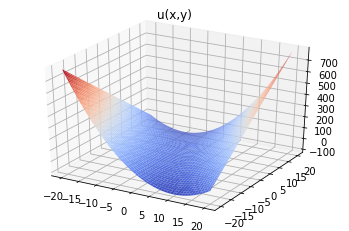

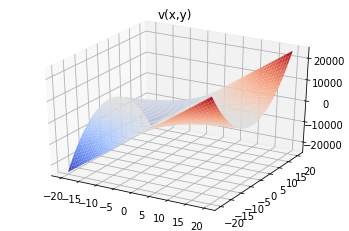

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

3) Contour plot.

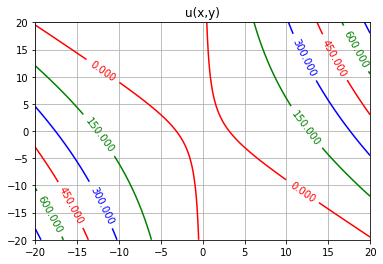

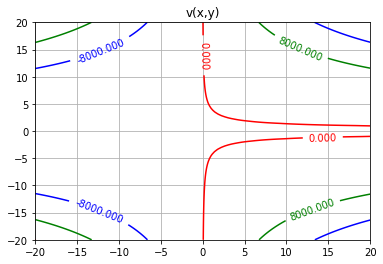

In [11]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

3) Which lines are we interested in?

4)Let's overlay them on top of each other.

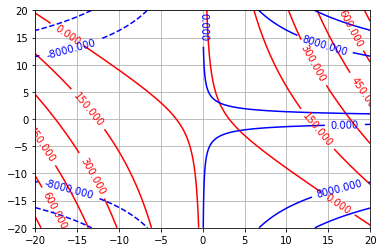

In [12]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

5) Where (approximately) are the solutions to $u(x,y)=0$ and $v(x,y)=0$

In [ ]:
# Where red and blue line intersect

### Newton's Method (>1D)

1) What matrix equation you need to solve to find the next guess ($x_{n+1}, y_{n+1}$)?

In [17]:
# x_{n+1} = x_n + delta_x
# y_{n+1} = y_n + delta_y

# [-U_(x_n, y_n), -V_(x_n, y_n)] = [ [U_'x, U_'y], [V_'x, V_'y] ] [delta_x, delta_y]

def ux_diff(x, y):
    return 2*x + y

def uy_diff(x, y):
    return x

def vx_diff(x, y):
    return 3*y**2

def vy_diff(x, y):
    return 1 + 6*x*y


x = 2.5
y = 3.5

for i in range(10):
    A = np.array([ [ux_diff(x, y), uy_diff(x, y)],
            [vx_diff(x, y), vy_diff(x, y)]
        ])
    B = np.array([-u(x, y), -v(x, y)])
    dx, dy = np.linalg.solve(A, B)
    x = x + dx
    y = y + dy

print(x, y)

2.0 3.0


2)Where should you start your guess ($x_0, y_0$)?

In [22]:
x = 2.5
y = 3.5

3) Find ($x_1, y_1$)

In [26]:
x = 2.5
y = 3.5

for i in range(1):
    A = np.array([ [ux_diff(x, y), uy_diff(x, y)],
            [vx_diff(x, y), vy_diff(x, y)]
        ])
    B = np.array([-u(x, y), -v(x, y)])
    dx, dy = np.linalg.solve(A, B)
    x = x + dx
    y = y + dy
print(x, y)

2.0272132276954875 3.1074750258353427


4)Find ($x_2, y_2$)

In [27]:
x = 2.5
y = 3.5

for i in range(2):
    A = np.array([ [ux_diff(x, y), uy_diff(x, y)],
            [vx_diff(x, y), vy_diff(x, y)]
        ])
    B = np.array([-u(x, y), -v(x, y)])
    dx, dy = np.linalg.solve(A, B)
    x = x + dx
    y = y + dy
print(x, y)

1.9995033166445113 3.0035627724168052


5)Write a program to do what you just did and find  $(x_5, y_5)$? Plot to verify. (Just add plt.plot([x],[y])). You may use np.linalg.solve.

2.0 3.0


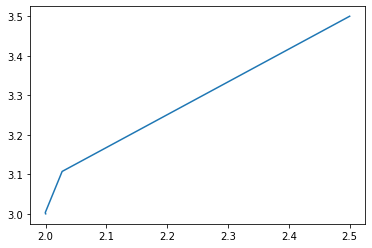

In [34]:
x = 2.5
y = 3.5

x_arr = [x]
y_arr = [y]

for i in range(5):
    A = np.array([ [ux_diff(x, y), uy_diff(x, y)],
            [vx_diff(x, y), vy_diff(x, y)]
        ])
    B = np.array([-u(x, y), -v(x, y)])
    dx, dy = np.linalg.solve(A, B)
    x = x + dx
    y = y + dy
    x_arr.append(x)
    y_arr.append(y)    
print(x, y)
plt.plot(x_arr, y_arr)

6) Find the other solution.

7) Does it guarantee to converge to the right answer?

8) Implement np.linalg.solve using gaussian elimination.